# **IMPORT LIBS**

In [1]:
import pandas as pd
import sys
from collections import Counter

graphs_path = 'Graphs'
sys.path.append(graphs_path)

spotify_path = 'Spotify'
sys.path.append(spotify_path)

graphics_path = 'Graphics'
sys.path.append(graphics_path)

from Graphs.SimpleGraph import SimpleGraph
from Graphics.Graphics import Graphics

# **Auxiliary function to print basic information**

In [2]:
def printBasicInformation(network):
    print(f'Number of nodes: {network.get_number_of_nodes()}')
    print(f'Number of edges: {network.get_number_of_edges()}')
    print(f'Number of components: {network.get_number_connected_components()}')
    print(f'Smallest degree in the network: {network.get_minimum_degree()}')
    print(f'Largest degree in the network: {network.get_maximum_degree()}')
    print(f'Average degree of the network: {network.get_average_degree()}')
    print(f'Network density: {network.get_density()}')

# **Loading the data**

In [3]:
df = pd.read_csv('../data/spotify_artists.csv')
df

,external_urls,followers,genres,id,name,popularity,uri,related_artists_ids
0,https://open.spotify.com/artist/4dpARuHxo51G3z...,57657211,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,86,spotify:artist:4dpARuHxo51G3z768sgnrY,"5WUlDfRSoLAfcVSX1WnrxN, 2wY79sveU1sp5g7SokKOiI..."
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,98814719,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,"4nDoRrQiYLoBzwC5BhVJzF, 0C8ZW7ezQVs4URX5aX7Kqx..."
2,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14722549,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca,"5dHt1vcEm9qb8fCyLcB3HL, 2P5sC9cVZDToPxyomzF1UH..."
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,118971229,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02,"0C8ZW7ezQVs4URX5aX7Kqx, 1McMsnEElThX1knmY4oliG..."
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,25991892,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,85,spotify:artist:7Ln80lUS6He07XvHI8qqHH,"77SW9BnxLY8rJ0RciFqkHh, 0epOFNiUfyON9EYx7Tpr6V..."
...,...,...,...,...,...,...,...,...
14783,https://open.spotify.com/artist/7EyzyrMNgqiK8b...,1417807,rap mineiro,7EyzyrMNgqiK8bMrbkOT9l,Sidoka,59,spotify:artist:7EyzyrMNgqiK8bMrbkOT9l,"4oPnjkJcLqOim9KJxvIYMz, 1QBWA6tuiZ0JuDluPqbe71..."
14784,https://open.spotify.com/artist/6gzXCdfYfFe5XK...,2313438,"k-pop, k-pop boy group",6gzXCdfYfFe5XKhPKkYqxV,SUPER JUNIOR,58,spotify:artist:6gzXCdfYfFe5XKhPKkYqxV,"6nVMMEywS5Y4tsHPKx1nIo, 1bkpTEmumLC3xc7HgMsttU..."
14785,https://open.spotify.com/artist/7AAXcP4NpvvLM9...,609413,"sertanejo, sertanejo universitario",7AAXcP4NpvvLM9Xcfy64ij,Hugo Pena & Gabriel,40,spotify:artist:7AAXcP4NpvvLM9Xcfy64ij,"5Dyg6H3QJHQV5c7ojyKWyv, 4ZUahcHoVxr4lsrfdmhjhV..."
14786,https://open.spotify.com/artist/5KvkOKroKLz202...,186296,"folk metal, german metal, melodic death metal,...",5KvkOKroKLz202ioXfGWR2,Equilibrium,49,spotify:artist:5KvkOKroKLz202ioXfGWR2,3t5X2CVDf5mrlIx1SdvWYM


# **Creating the complex network related to the Stronger Connecetion Recommender**



## **Creating the Simple Network (artists)**

In [4]:
genres = {}
for index in range(len(df)):
    for genre_artist in df['genres'][index].split(', '):
        if genre_artist not in genres: genres[genre_artist] = []
        genres[genre_artist].append(df['id'][index])

In [5]:
connections = []
for genre in genres:
    for i in range(len(genres[genre])):
        for j in range(i+1, len(genres[genre])):
           artist_1, artist_2 = (genres[genre][i], genres[genre][j]) if genres[genre][i] < genres[genre][j] else (genres[genre][j], genres[genre][i])
           connections.append((artist_1, artist_2))

In [6]:
counter = Counter(connections)
edges = []
for artists, weight in counter.items():
    artist_1, artist_2 = artists
    edges.append((artist_1, artist_2, weight))

In [7]:
G = SimpleGraph()
artists_nodes = [(df['id'][index], dict(popularity=int(df['popularity'][index]), name=str(df['name'][index]), genre=str(df['genres'][index].split(', ')[0]))) for index in range(len(df['id']))]
G.add_nodes(artists_nodes)
G.add_edges(edges)
name_network = 'network_from_Stronger_Connections_Recommender'

## **Analyzing the network**

### **Basic information**

In [8]:
printBasicInformation(G)

Number of nodes: 14788
Number of edges: 774610
Number of components: 118
Smallest degree in the network: 1
Largest degree in the network: 768
Average degree of the network: 104.76196916418718
Network density: 0.0070847345076206925


### **Degree distribution**

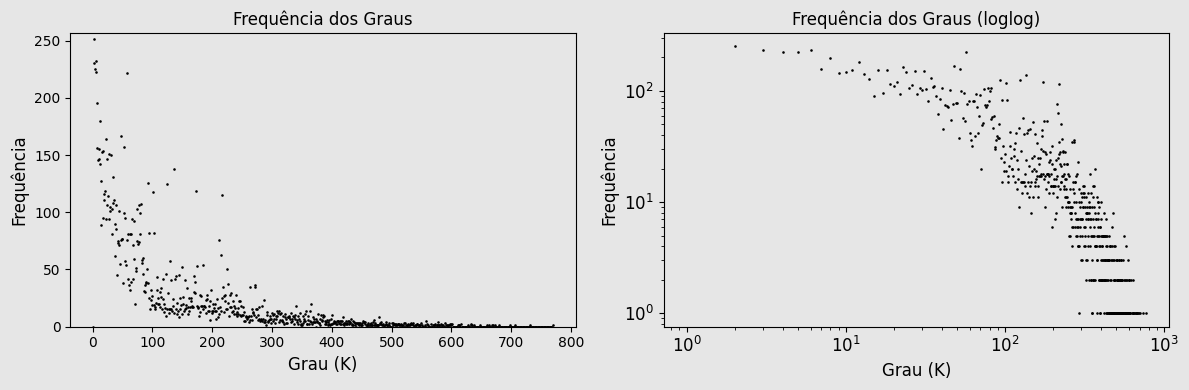

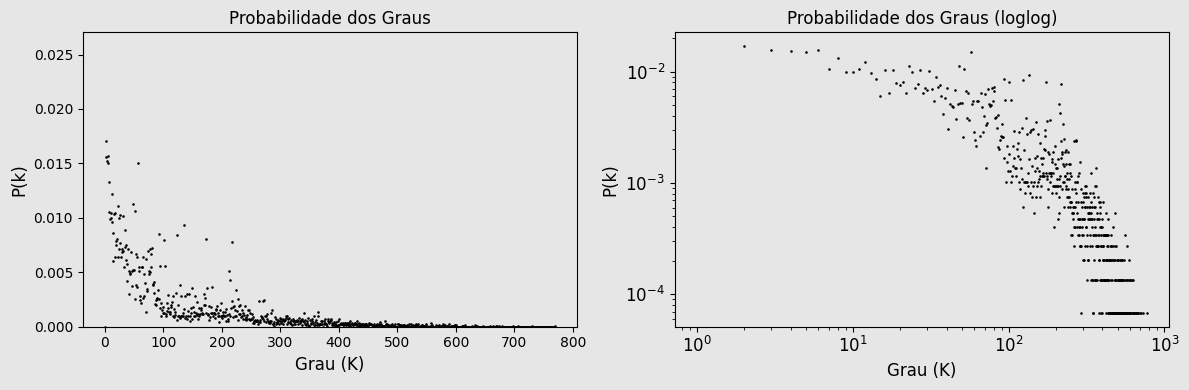

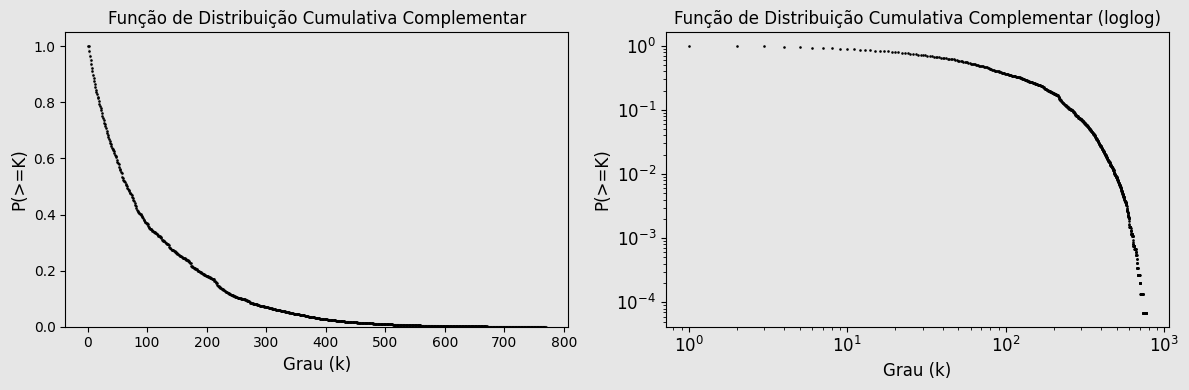

In [9]:
frequencies_of_degrees, probability_of_degrees, accumulated_probability_of_degress = G.get_degree_distribution()
Graphics.create_graphic_degrees(data = frequencies_of_degrees, xLabel = 'Grau (K)', yLabel = 'Frequência', title = 'Frequência dos Graus', limit = 5, lines = False, name_network = name_network)
Graphics.create_graphic_degrees(data = probability_of_degrees, xLabel = 'Grau (K)', yLabel = 'P(k)', title = 'Probabilidade dos Graus', limit = 0.01, lines = False,  name_network = name_network)
Graphics.create_graphic_degrees(data = accumulated_probability_of_degress, xLabel = 'Grau (k)', yLabel = 'P(>=K)', title = 'Função de Distribuição Cumulativa Complementar', limit = 0.05, lines = True,  name_network = name_network)

### **Centralities**

#### **Degree Centrality**

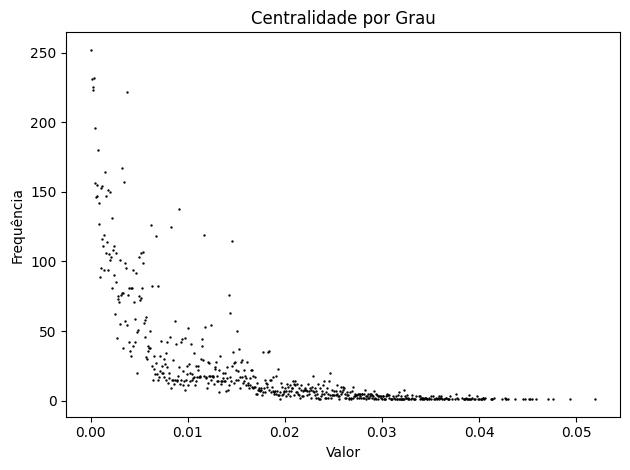

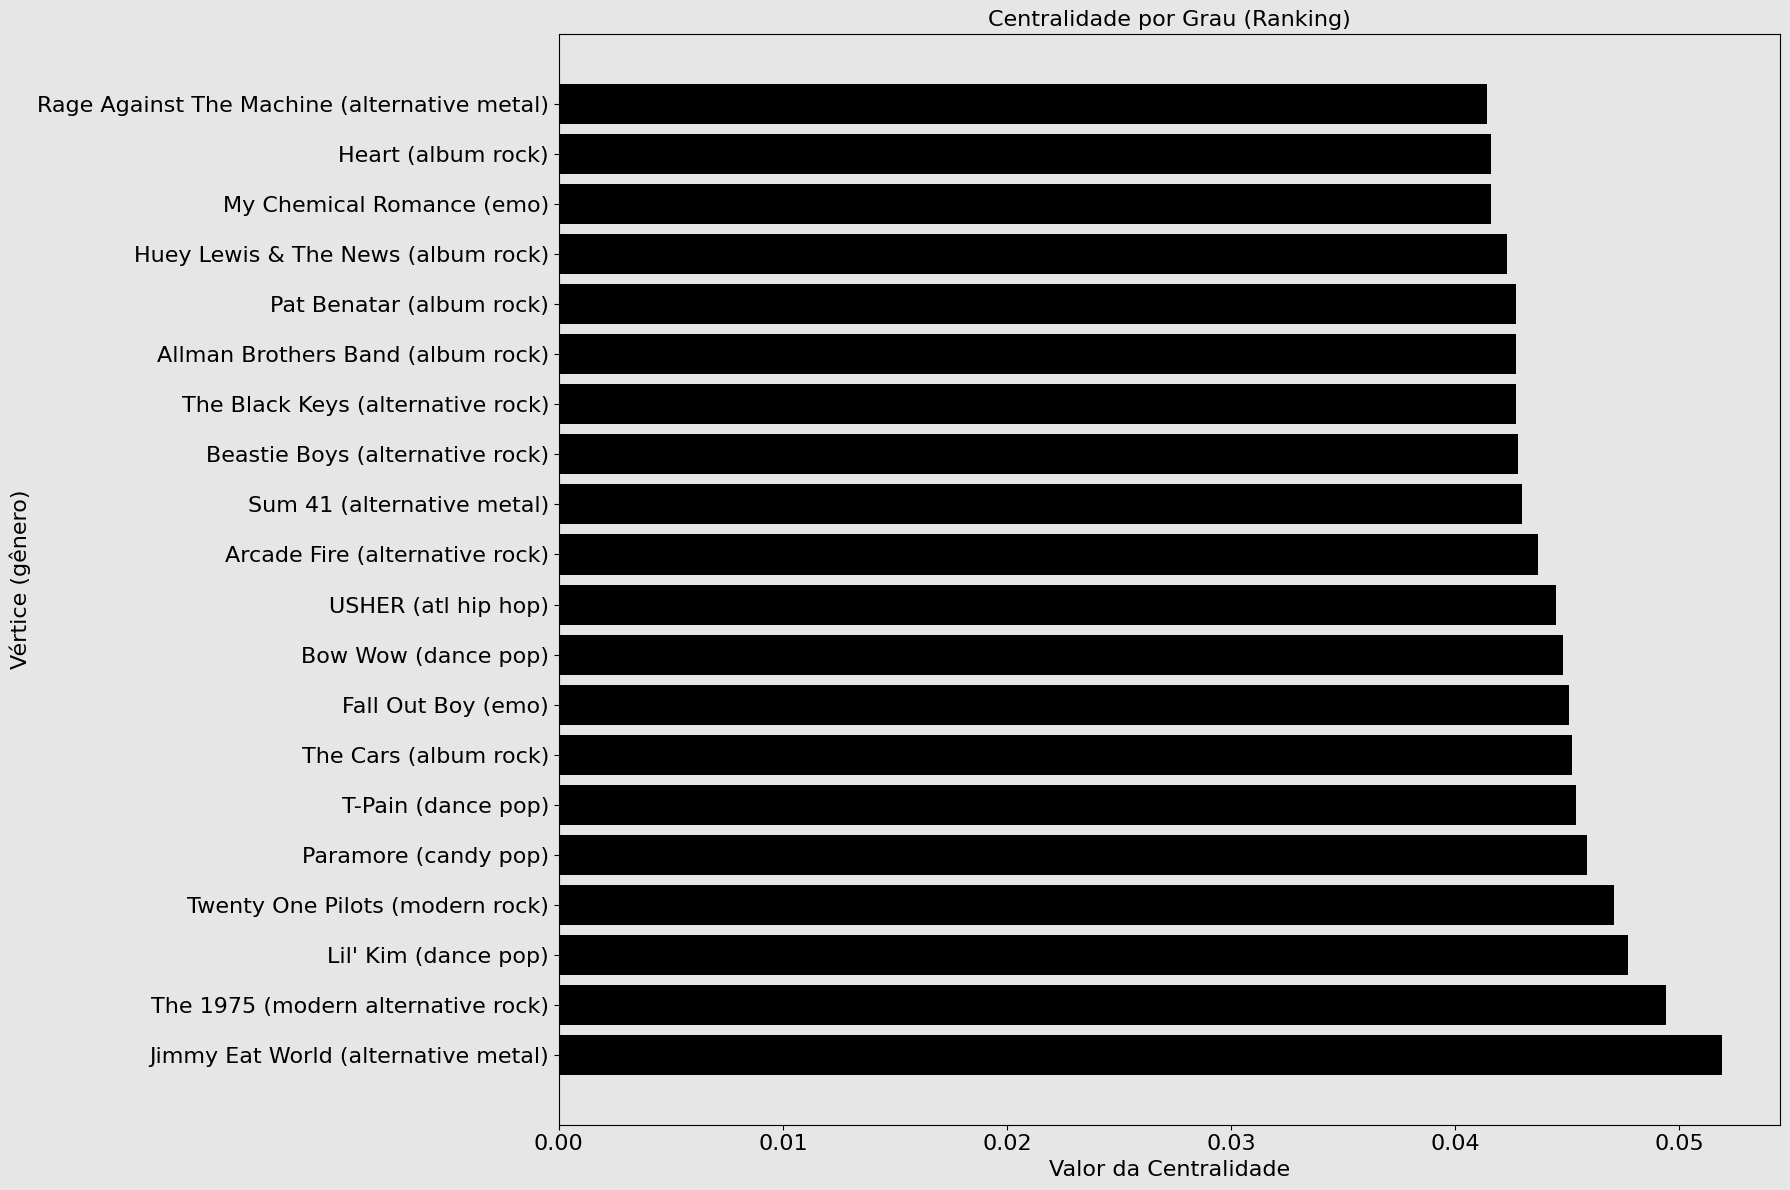

In [10]:
degree_centrality = G.get_degree_centrality()
analysis_centrality=Graphics.create_graphic_centrality(data=degree_centrality, title='Centralidade por Grau', name_network=name_network)
Graphics.create_ranking_centrality(centrality=degree_centrality, graph=G, title='Centralidade por Grau (Ranking)', name_network=name_network, label='genre')

#### **Eigenvector Centrality**

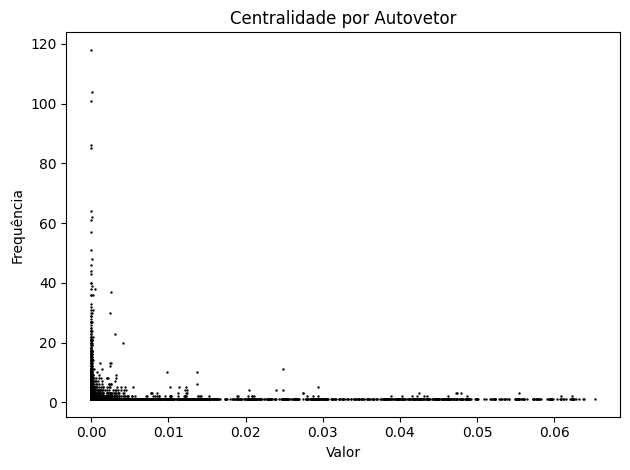

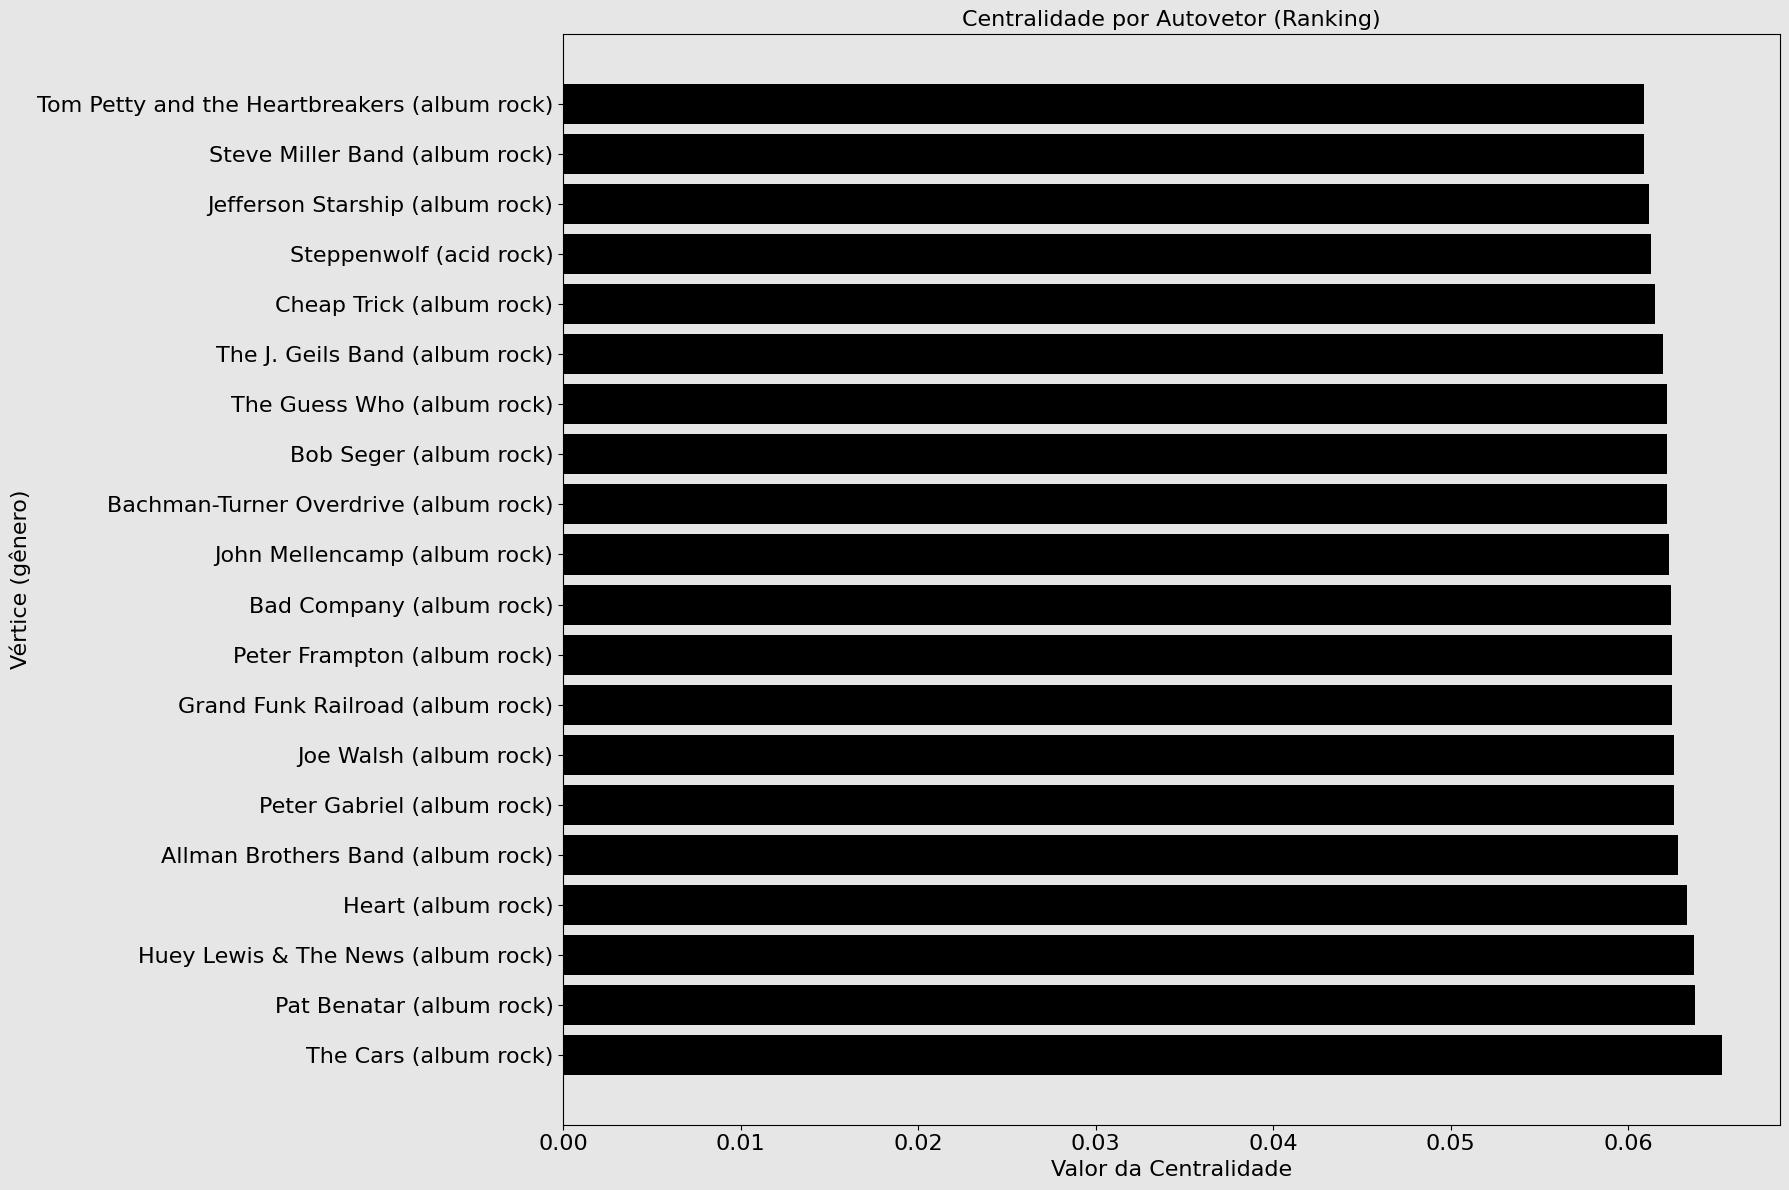

In [11]:
eigenvector_centrality = G.get_eigenvector_centrality(weight=weight)
analysis_centrality=Graphics.create_graphic_centrality(data=eigenvector_centrality, title='Centralidade por Autovetor', name_network=name_network)
Graphics.create_ranking_centrality(centrality=eigenvector_centrality, graph=G, title='Centralidade por Autovetor (Ranking)', name_network=name_network, label='genre')

### **Communities**

In [12]:
louvain_communities = G.get_louvain_communities(weight=weight)
sorted_louvain_communities = sorted(louvain_communities, key=len, reverse=True)

In [13]:
for index, community in enumerate(sorted_louvain_communities):
    print(f'Community {index:2}', end=' ')
    community_list = []
    for artist_id in community:
        community_list.append(G.graph.nodes[artist_id]['name'])
    print(f'(size: {len(community_list):4}): ', ' | '.join(community_list))

Community  0 (size: 1938):  Rainbow | Oasis | Thom Yorke | Gorillaz | Ginger Root | Morningsiders | Days Of The New | Death Cab for Cutie | Sum 41 | Quicksilver Messenger Service | Future Islands | Wolf Parade | Thievery Corporation | A Great Big World | The Proclaimers | Sting | Spandau Ballet | Operation Ivy | Warpaint | Kate Bush | Jane's Addiction | Kansas | Marc Cohn | X-Ray Spex | Slowdive | Canned Heat | The Beatles | U.K. Subs | Culture Club | Bright Eyes | Dead Or Alive | HammerFall | Killswitch Engage | XTC | The Ivy | Parachute | Wine Lips | The Hunna | Quarterflash | Flyte | The Queers | Palaye Royale | Loverboy | Jimmie Vaughan | The Robert Cray Band | Angus & Julia Stone | Whiskeytown | Porches | Quiet Company | Ratt | Bombay Bicycle Club | Aerosmith | Epica | Dorothy | Eluveitie | Morcheeba | Ben Folds | Elle King | Jamie xx | The Flashbulb | Alien Ant Farm | Elvis Costello | Dope | Motörhead | Bryan Adams | William Fitzsimmons | Eilen Jewell | Massive Attack | 3 Doors D

### **Analyzing centrality in some previous communities**

#### **Auxiliary function**

In [14]:
def create_newtok_based_on_a_community(graph, nodes_community):
    edges_community_aux = []
    
    for i in range(len(nodes_community)):
        for j in range(i+1, len(nodes_community)):
            if graph.graph.has_edge(nodes_community[i], nodes_community[j]) or graph.graph.has_edge(nodes_community[j], nodes_community[i]):    
                artist_1, artist_2 = (nodes_community[i], nodes_community[j]) if nodes_community[i] < nodes_community[j] else (nodes_community[j], nodes_community[i])
                edges_community_aux.append((artist_1, artist_2))
    
    counter = Counter(edges_community_aux)
    edges_community = []
    edges_orginal_graph = list(G.graph.edges)
    
    for artists, _ in counter.items():
        artist_1, artist_2 = artists
        weight = graph.get_weight_edge(artist_1, artist_2)
        edges_community.append((artist_1, artist_2, weight))

    G_Community = SimpleGraph()
    G_Community.add_nodes(nodes_community)
    G_Community.add_edges(edges_community)

    return G_Community


#### **Community 0**

In [15]:
number_community = 0
nodes_community = list(sorted_louvain_communities[number_community])
G_Community_0 = create_newtok_based_on_a_community(G, nodes_community)

##### **Basic information**

In [16]:
printBasicInformation(G_Community_0)

Number of nodes: 1938
Number of edges: 169664
Number of components: 1
Smallest degree in the network: 1
Largest degree in the network: 655
Average degree of the network: 175.09184726522187
Network density: 0.09039331299185435


##### **Degree Centrality**

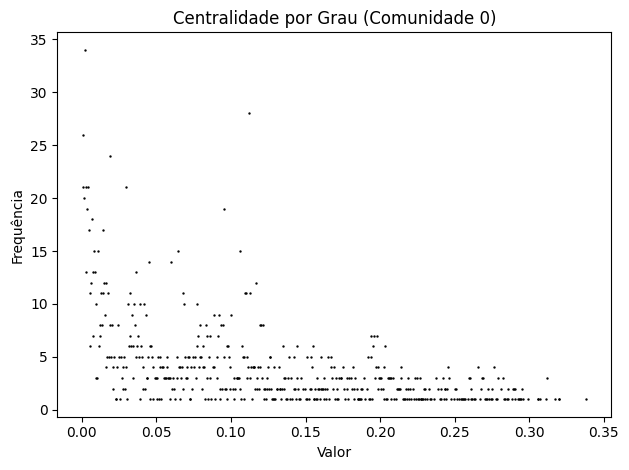

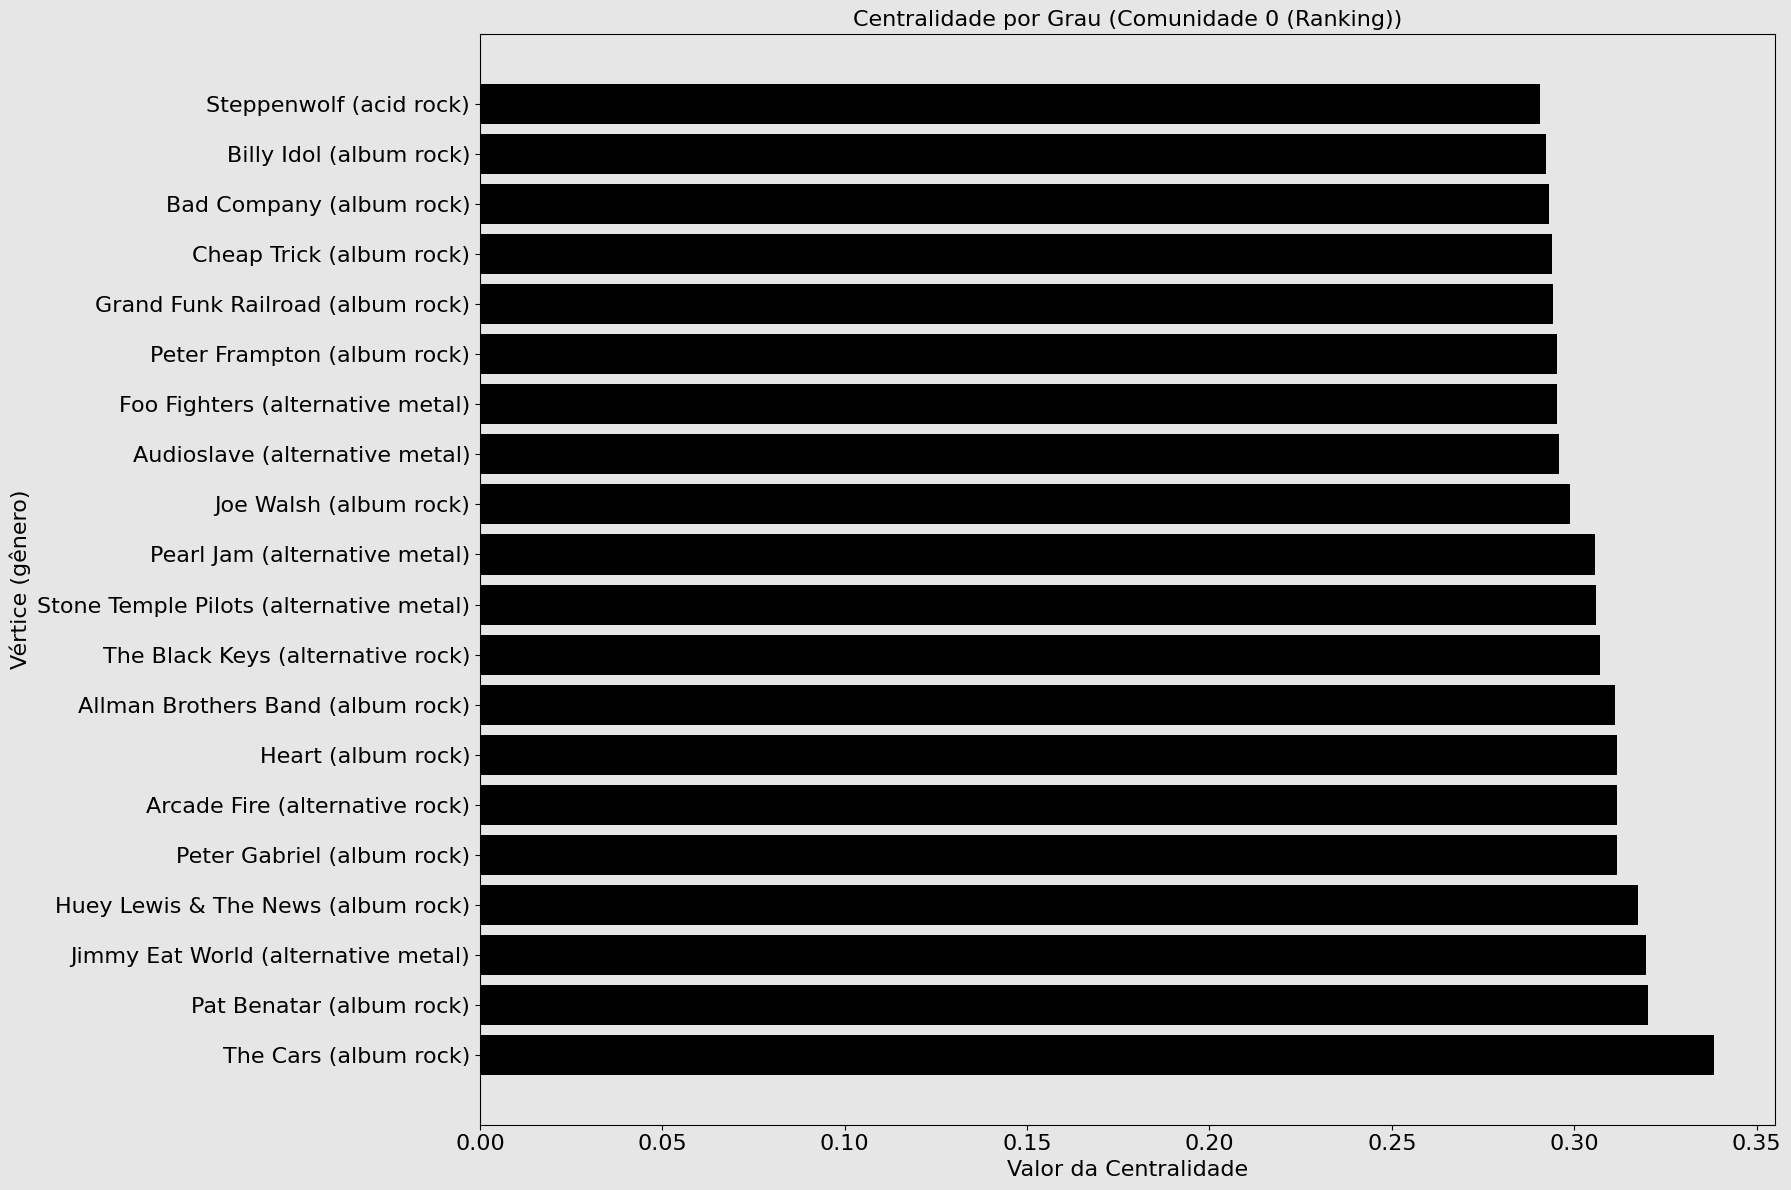

In [17]:
degree_centrality = G_Community_0.get_degree_centrality()
analysis_centrality = Graphics.create_graphic_centrality(data=degree_centrality, title=f'Centralidade por Grau (Comunidade {number_community})', name_network=f'{name_network}_community_{number_community}')
Graphics.create_ranking_centrality(centrality=degree_centrality, graph=G, title=f'Centralidade por Grau (Comunidade {number_community} (Ranking))', name_network=f'{name_network}_community_{number_community}', label='genre')

##### **Eigenvector Centrality**

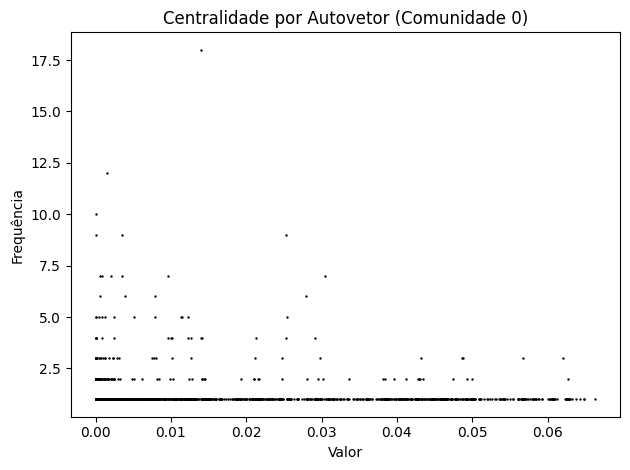

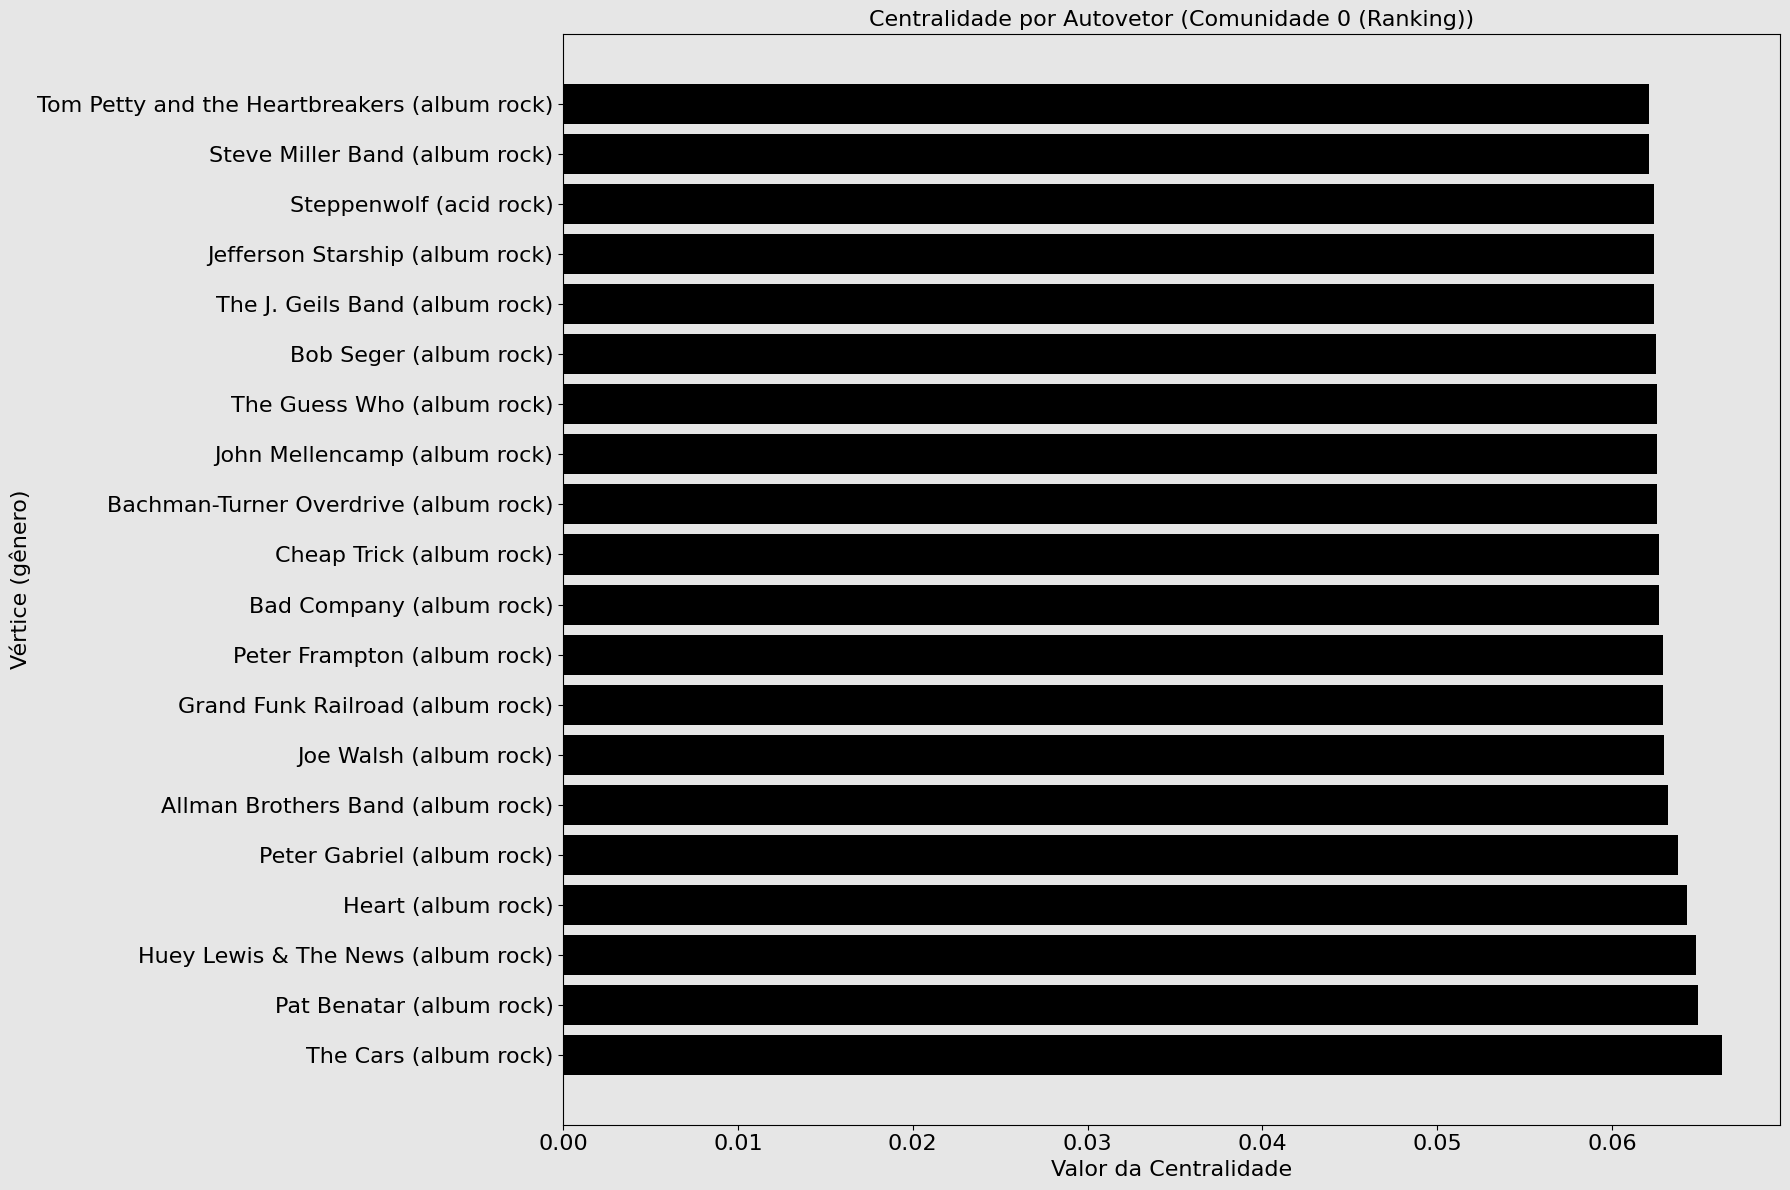

In [18]:
eigenvector_centrality = G_Community_0.get_eigenvector_centrality(weight=weight)
analysis_centrality=Graphics.create_graphic_centrality(data=eigenvector_centrality, title=f'Centralidade por Autovetor (Comunidade {number_community})', name_network=f'{name_network}_community_{number_community}')
Graphics.create_ranking_centrality(centrality=eigenvector_centrality, graph=G, title=f'Centralidade por Autovetor (Comunidade {number_community} (Ranking))', name_network=f'{name_network}_community_{number_community}', label='genre')

#### **Community 9**

In [19]:
number_community = 9
nodes_community = list(sorted_louvain_communities[number_community])
G_Community_9 = create_newtok_based_on_a_community(G, nodes_community)

##### **Basic information**

In [20]:
printBasicInformation(G_Community_9)

Number of nodes: 452
Number of edges: 9857
Number of components: 1
Smallest degree in the network: 1
Largest degree in the network: 157
Average degree of the network: 43.61504424778761
Network density: 0.09670741518356454


##### **Degree Centrality**

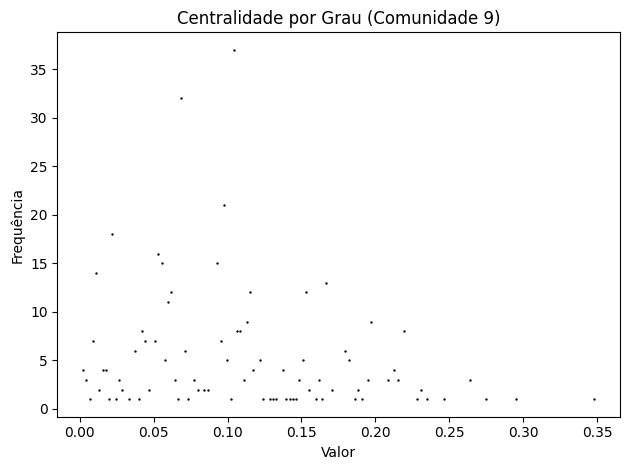

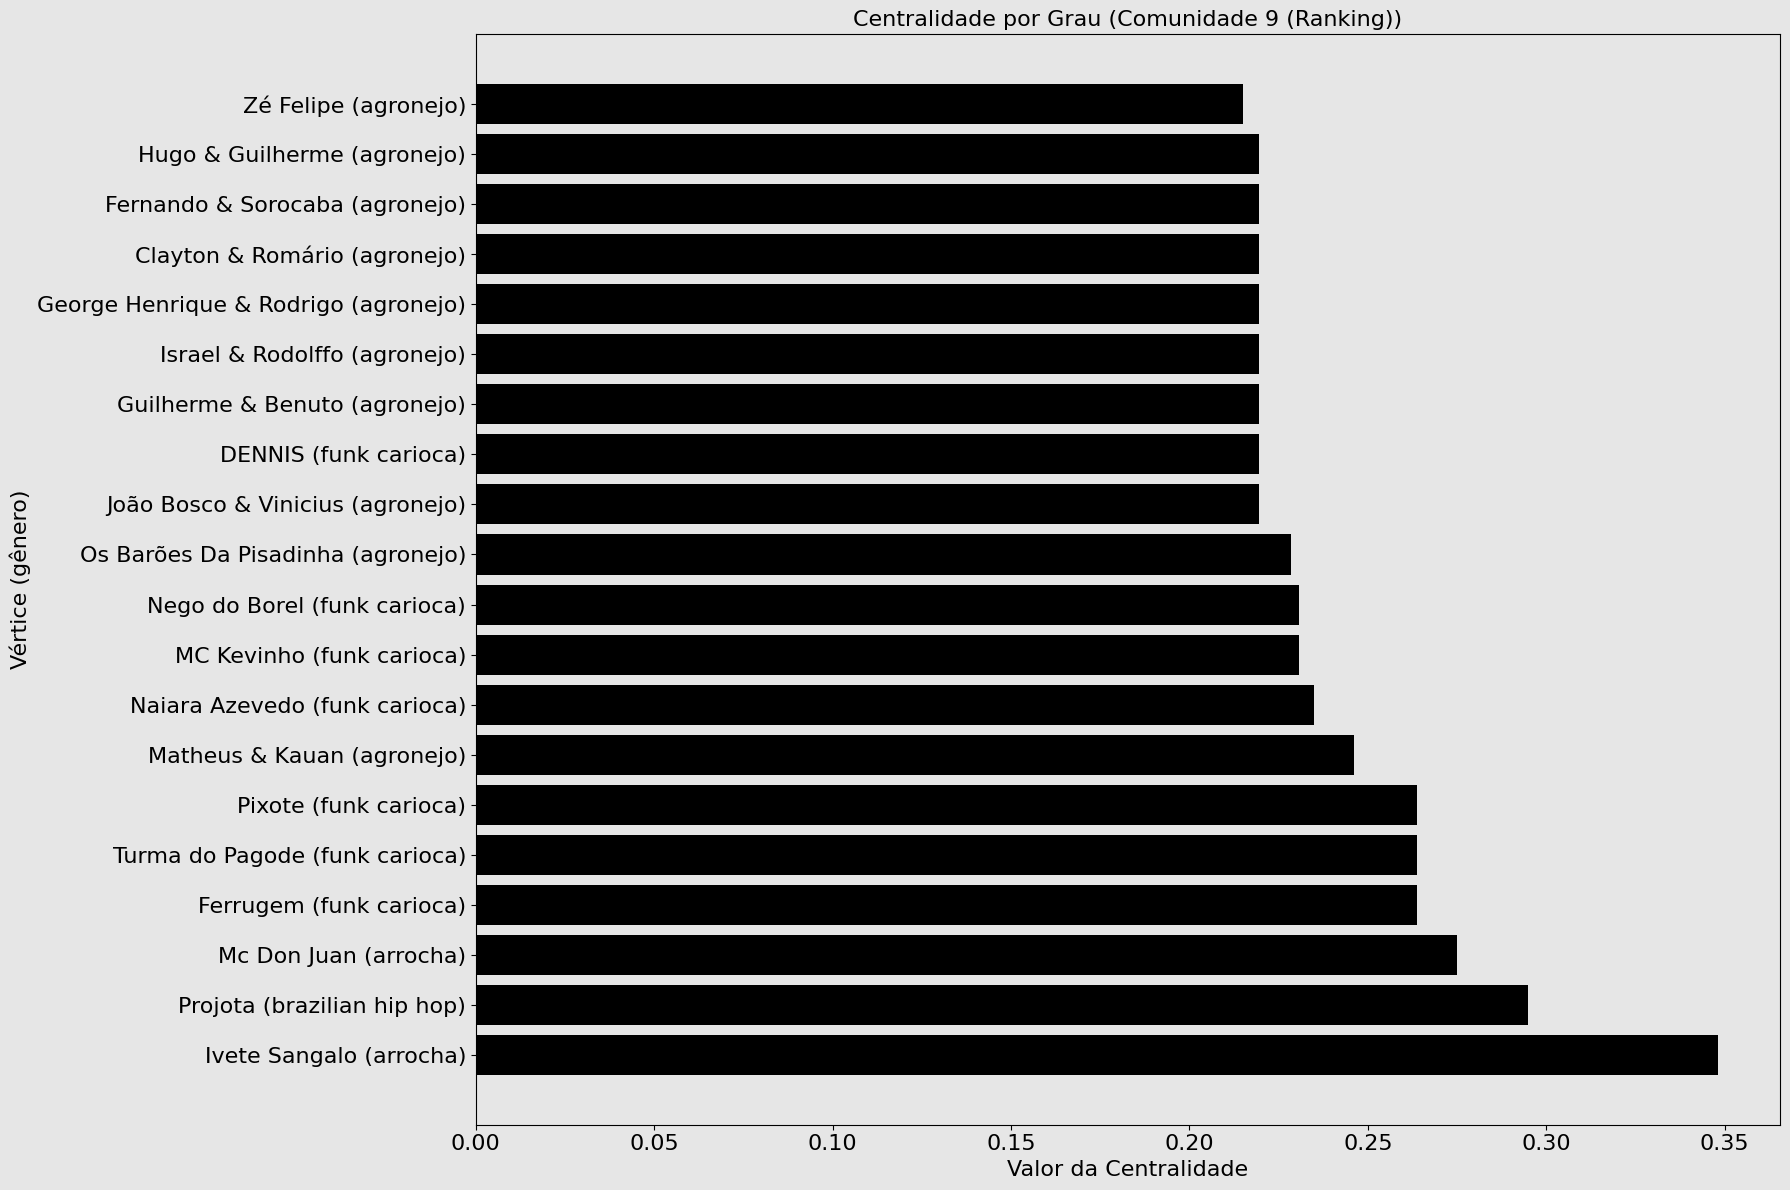

In [21]:
degree_centrality = G_Community_9.get_degree_centrality()
analysis_centrality = Graphics.create_graphic_centrality(data=degree_centrality, title=f'Centralidade por Grau (Comunidade {number_community})', name_network=f'{name_network}_community_{number_community}')
Graphics.create_ranking_centrality(centrality=degree_centrality, graph=G, title=f'Centralidade por Grau (Comunidade {number_community} (Ranking))', name_network=f'{name_network}_community_{number_community}', label='genre')

##### **Eigenvector Centrality**

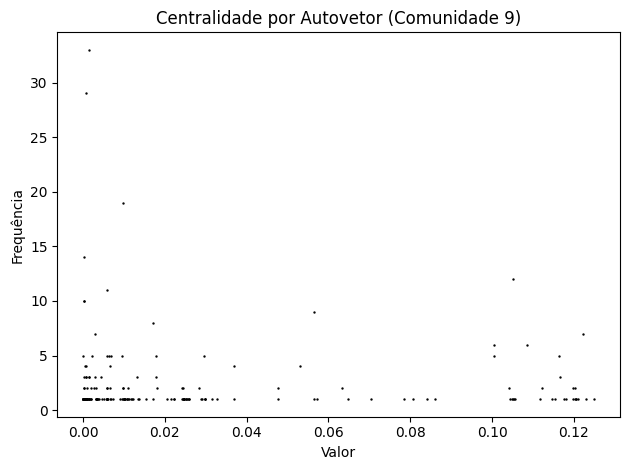

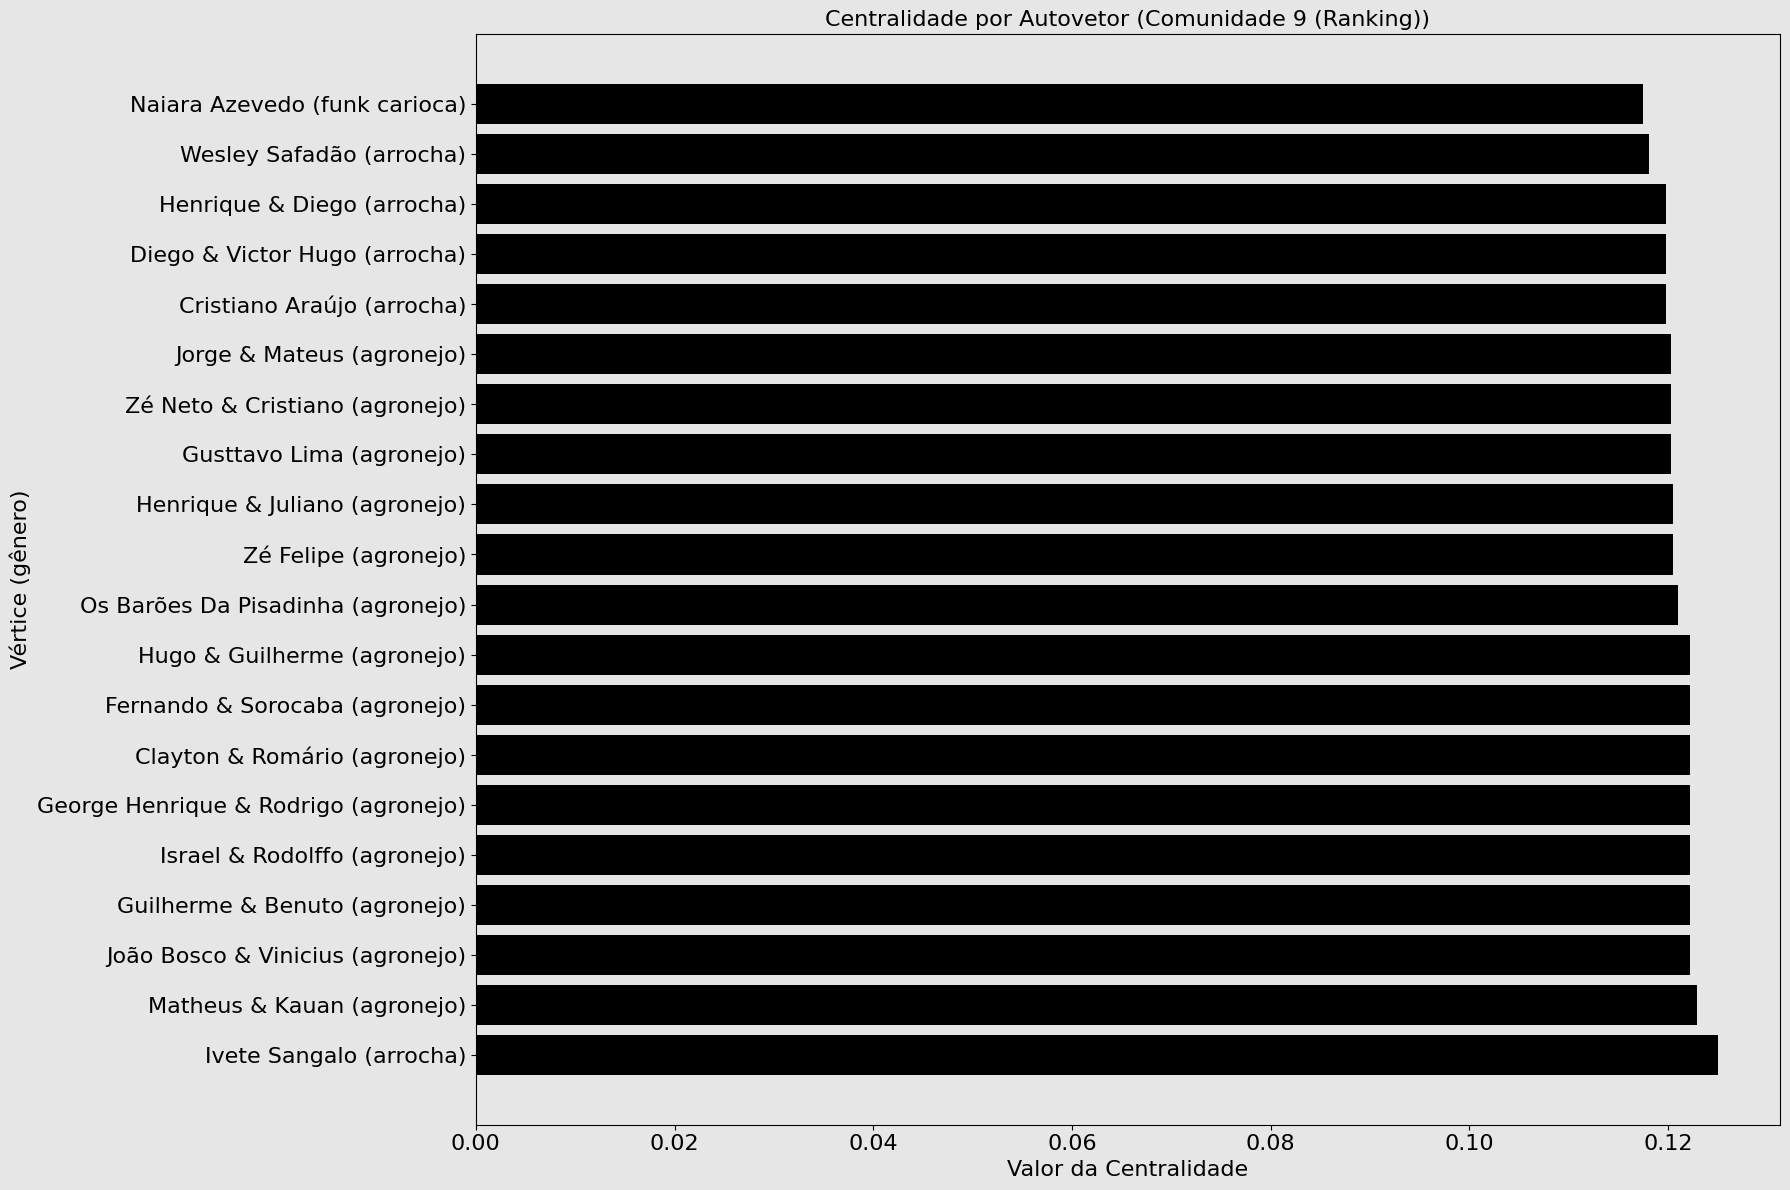

In [22]:
eigenvector_centrality = G_Community_9.get_eigenvector_centrality(weight=weight)
analysis_centrality=Graphics.create_graphic_centrality(data=eigenvector_centrality, title=f'Centralidade por Autovetor (Comunidade {number_community})', name_network=f'{name_network}_community_{number_community}')
Graphics.create_ranking_centrality(centrality=eigenvector_centrality, graph=G, title=f'Centralidade por Autovetor (Comunidade {number_community} (Ranking))', name_network=f'{name_network}_community_{number_community}', label='genre')

#### **Community 53**

In [23]:
number_community = 53
nodes_community = list(sorted_louvain_communities[number_community])
G_Community_53 = create_newtok_based_on_a_community(G, nodes_community)

##### **Basic information**

In [24]:
printBasicInformation(G_Community_53)

Number of nodes: 7
Number of edges: 21
Number of components: 1
Smallest degree in the network: 6
Largest degree in the network: 6
Average degree of the network: 6.0
Network density: 1.0


##### **Degree Centrality**

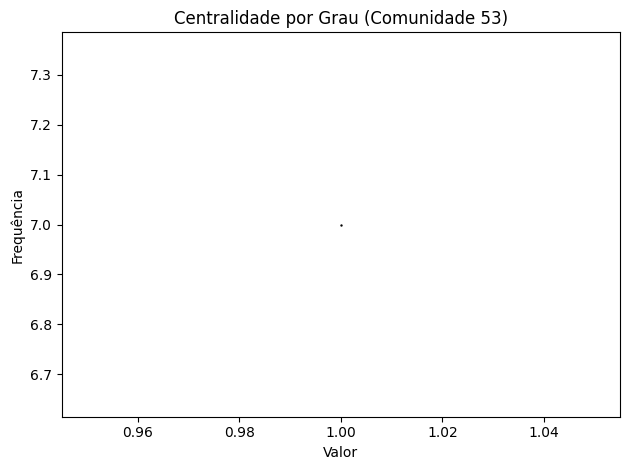

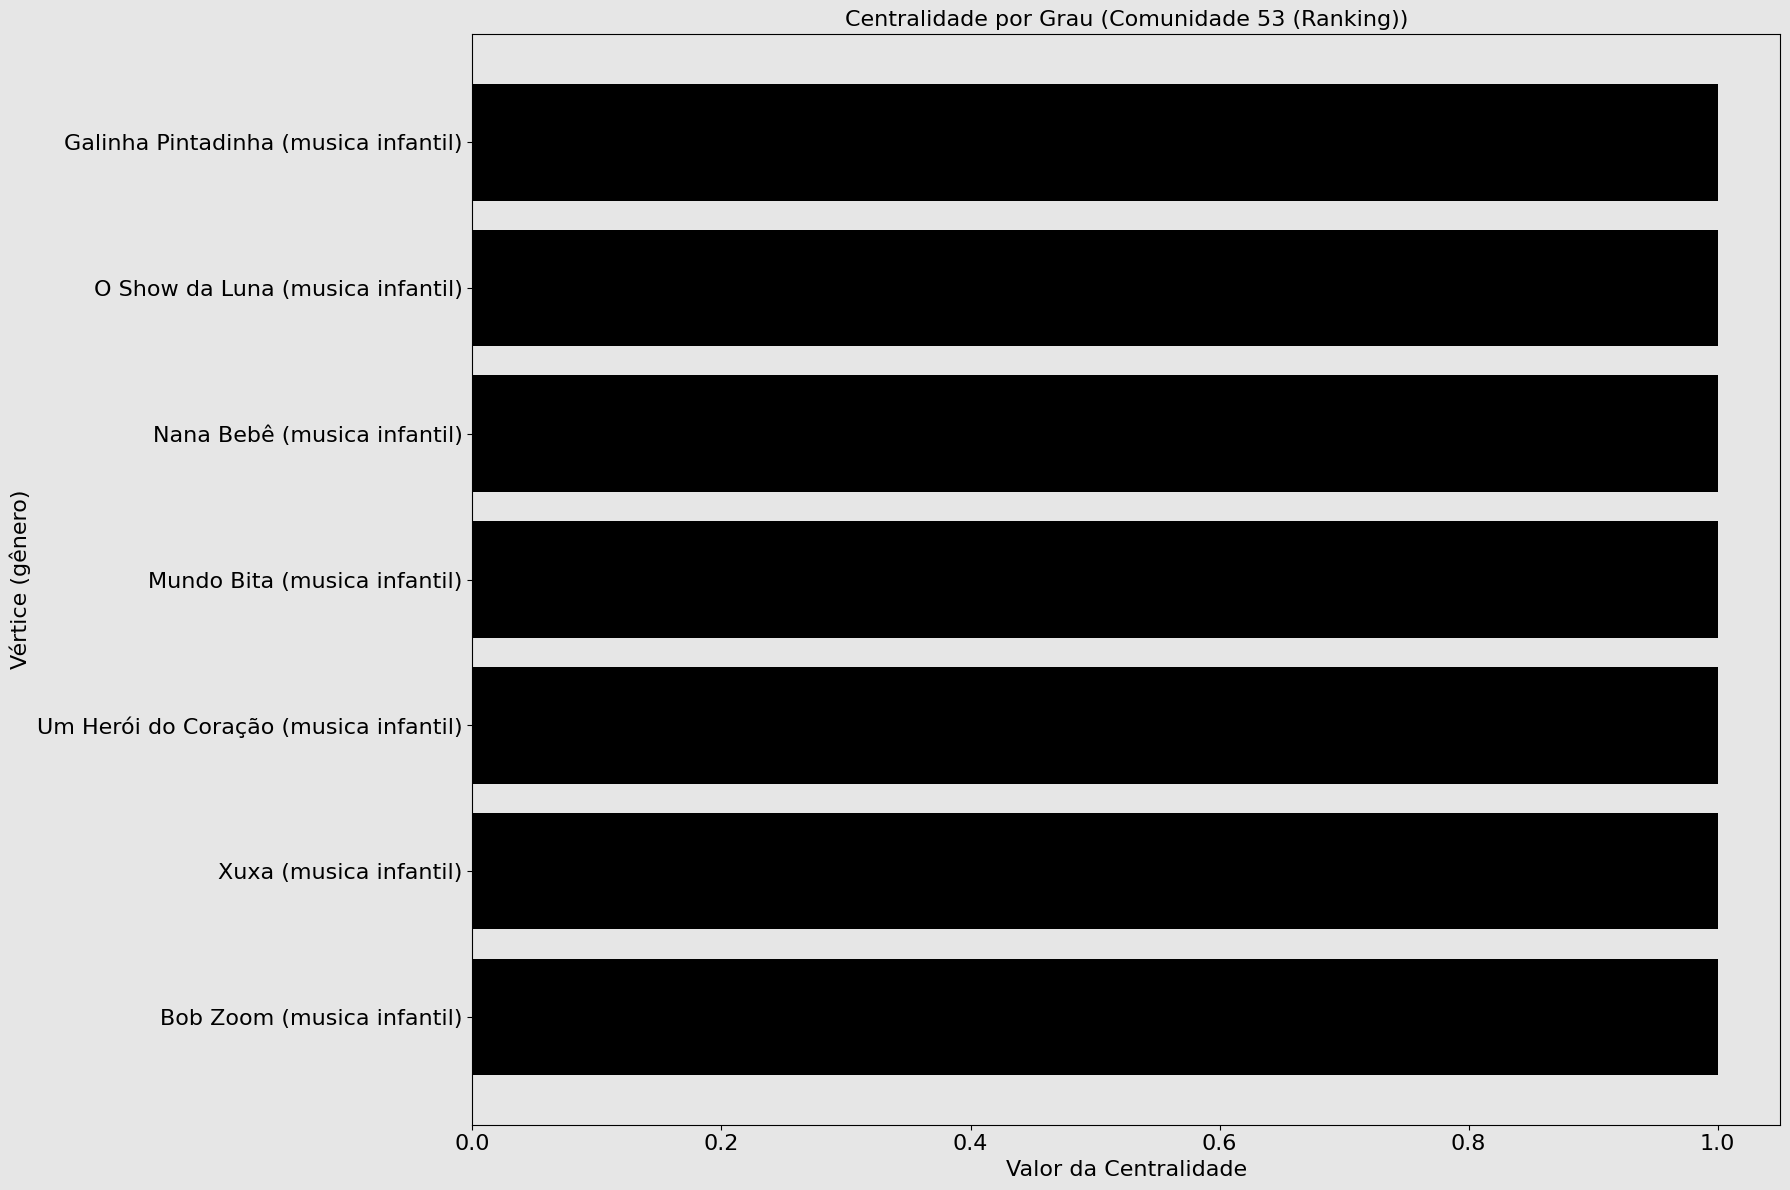

In [25]:
degree_centrality = G_Community_53.get_degree_centrality()
analysis_centrality = Graphics.create_graphic_centrality(data=degree_centrality, title=f'Centralidade por Grau (Comunidade {number_community})', name_network=f'{name_network}_community_{number_community}')
Graphics.create_ranking_centrality(centrality=degree_centrality, graph=G, title=f'Centralidade por Grau (Comunidade {number_community} (Ranking))', name_network=f'{name_network}_community_{number_community}', label='genre')

##### **Eigenvector Centrality**

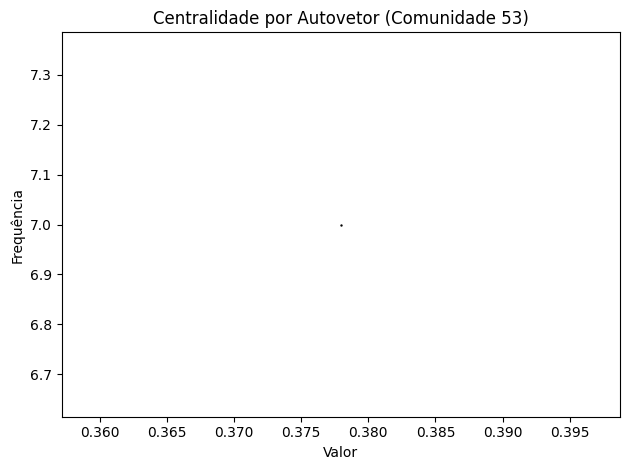

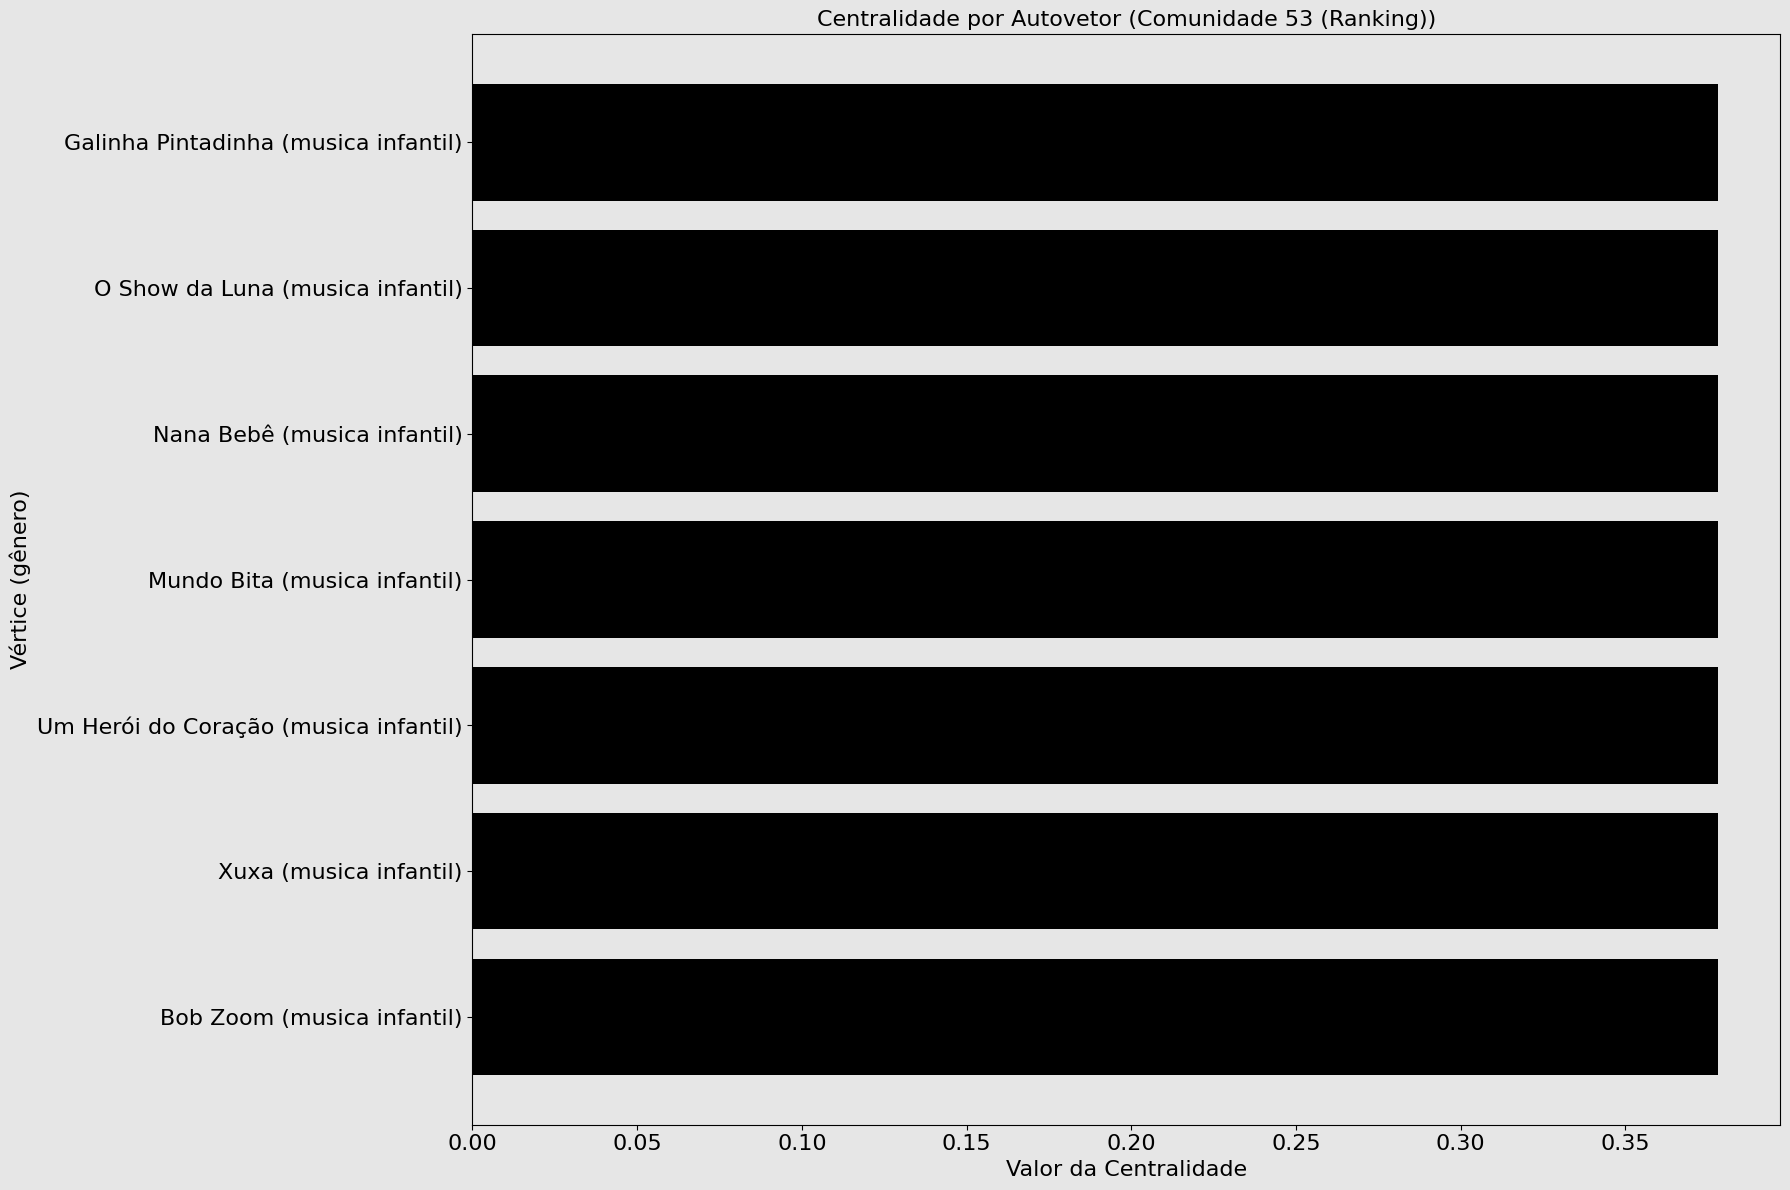

In [26]:
eigenvector_centrality = G_Community_53.get_eigenvector_centrality(weight=weight)
analysis_centrality=Graphics.create_graphic_centrality(data=eigenvector_centrality, title=f'Centralidade por Autovetor (Comunidade {number_community})', name_network=f'{name_network}_community_{number_community}')
Graphics.create_ranking_centrality(centrality=eigenvector_centrality, graph=G, title=f'Centralidade por Autovetor (Comunidade {number_community} (Ranking))', name_network=f'{name_network}_community_{number_community}', label='genre')